# Regression Analysis - Popularity Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
from preprocessing import load_data, clean_data
from regression import PopularityPredictor

In [2]:
df_raw = load_data('../data/spotify_2000.csv')
df = clean_data(df_raw)
print(f'Data shape: {df.shape}')

Data shape: (2000, 5)


In [3]:
feature_cols = ['danceability', 'energy', 'tempo']
X = df[feature_cols]
y = df['popularity']
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (2000, 3)
Target shape: (2000,)


In [4]:
models = ['linear', 'tree', 'forest']
results = {}

for model_type in models:
    predictor = PopularityPredictor(model_type=model_type)
    metrics = predictor.train(X, y, test_size=0.2)
    results[model_type] = metrics
    print(f'\n{model_type.upper()} MODEL:')
    for key, val in metrics.items():
        print(f'  {key}: {val:.4f}')


LINEAR MODEL:
  train_r2: 0.0009
  test_r2: -0.0018
  train_rmse: 21.1793
  test_rmse: 21.9067

TREE MODEL:
  train_r2: 0.1652
  test_r2: -0.1152
  train_rmse: 19.3591
  test_rmse: 23.1128

FOREST MODEL:
  train_r2: 0.8483
  test_r2: -0.1044
  train_rmse: 8.2519
  test_rmse: 23.0005


In [5]:
results_df = pd.DataFrame(results).T
print('\nModel Comparison:')
print(results_df.round(4))


Model Comparison:
        train_r2  test_r2  train_rmse  test_rmse
linear    0.0009  -0.0018     21.1793    21.9067
tree      0.1652  -0.1152     19.3591    23.1128
forest    0.8483  -0.1044      8.2519    23.0005


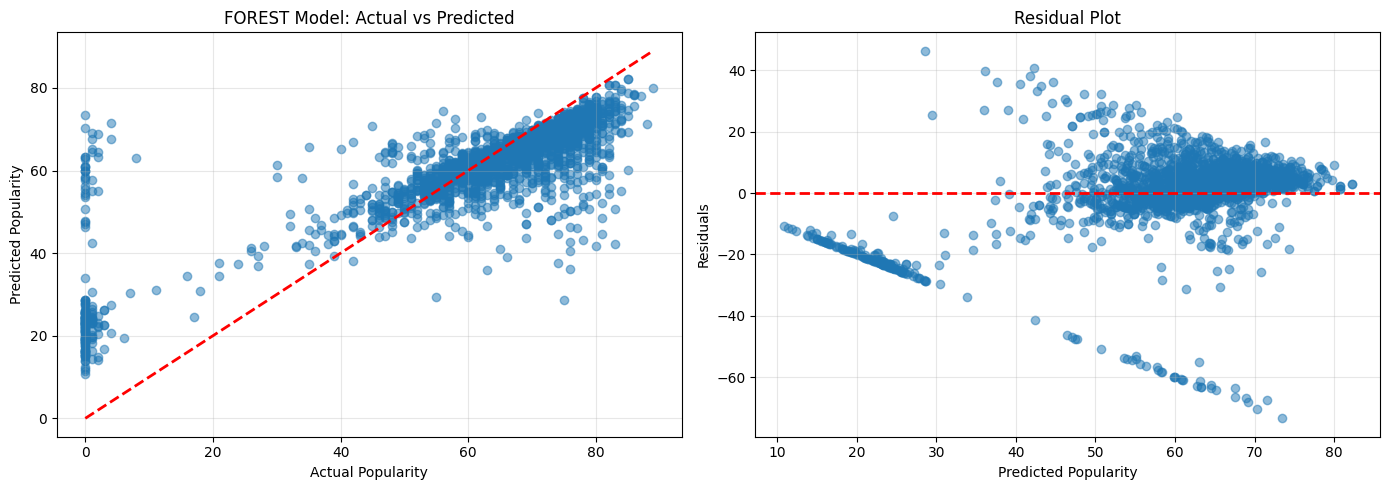

In [6]:
best_model_type = 'forest'
best_predictor = PopularityPredictor(model_type=best_model_type)
best_predictor.train(X, y, test_size=0.2)

y_pred = best_predictor.predict(X)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y, y_pred, alpha=0.5)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Popularity')
axes[0].set_ylabel('Predicted Popularity')
axes[0].set_title(f'{best_model_type.upper()} Model: Actual vs Predicted')
axes[0].grid(True, alpha=0.3)

residuals = y - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Popularity')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

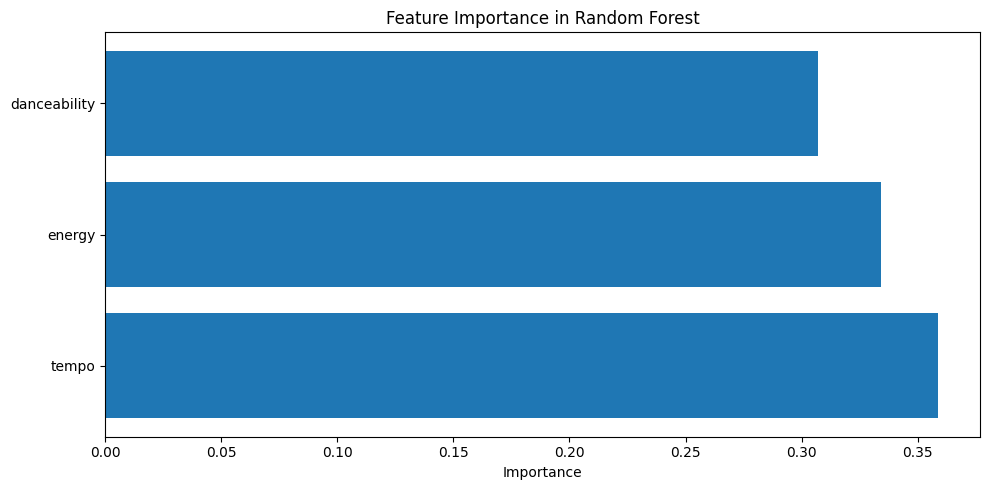


Feature Importances:
        feature  importance
2         tempo    0.358846
1        energy    0.333978
0  danceability    0.307176


In [7]:
if hasattr(best_predictor.model, 'feature_importances_'):
    importances = best_predictor.model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': feature_cols,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    ax.set_xlabel('Importance')
    ax.set_title('Feature Importance in Random Forest')
    plt.tight_layout()
    plt.show()
    
    print('\nFeature Importances:')
    print(feature_importance_df)

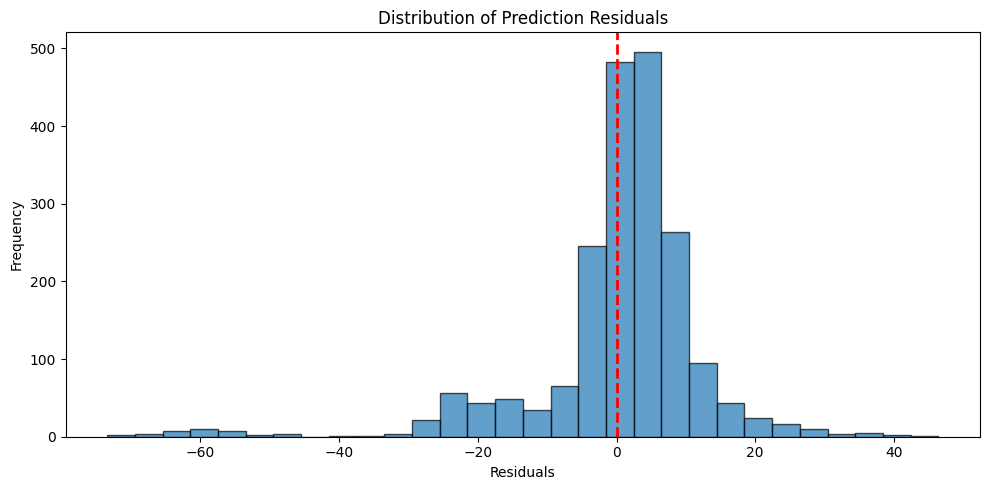

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Prediction Residuals')
ax.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.tight_layout()
plt.show()